Lo primero que vamos a hacer va a ser cargar el archivo CSV a un objeto DataFrame con Pandas. Una vez cargada, vamos a darle a su vez un vistazo inicial, para saber qué contiene. Al usar escribir "df" sin más, la jupyter notebook nos mostrará una vista truncada del DataFrame, y también nos indicará su size.

In [3]:
import pandas as pd


df = pd.read_csv('../Data/chess.csv')
df.head(5)

,game_id,game_order,event,site,date_played,round,white,black,result,white_elo,...,loser_elo,winner_loser_elo_diff,eco,termination,time_control,utc_date,utc_time,variant,ply_count,move_no_pair
0,2d39c0ad-11c1-45f9-b708-081a6cfd91a1,1,tournament,https://lichess.org/RwcXFF0S,2020.02.01,-,DoIhave2,unclJ,0-1,1696,...,1696.0,0,C00,Normal,600+0,2020.02.01,00:00:07,Rated Rapid,118.0,59.0
1,604dc0ba-e45d-4586-86d2-7d6ba32b74f4,2,tournament,https://lichess.org/SR0TkWAr,2020.02.01,-,Ice29,marcfd,1-0,1839,...,1630.0,209,C80,Normal,300+0,2020.02.01,00:00:07,Rated Blitz,25.0,13.0
2,82d8daaa-6abe-4e16-9c8a-f233ccd2f1c4,3,tournament,https://lichess.org/Dypqb5kl,2020.02.01,-,SpaceJockey,Ahmedusama212,1-0,1982,...,2080.0,-98,D00,Normal,180+0,2020.02.01,00:00:07,Rated Blitz,55.0,28.0
3,1b51f77a-4cd4-45db-85d4-3d22a3546c80,4,tournament,https://lichess.org/OfGWHoFV,2020.02.01,-,Macskajanos,capperuccio,1-0,2088,...,2096.0,-8,A40,Normal,180+0,2020.02.01,00:00:07,Rated Blitz,107.0,54.0
4,dc1e79c7-ed74-4d27-a389-859114aad0d2,5,game,https://lichess.org/ug8AEXKd,2020.02.01,-,Gregory_Moscow,Ealamn,0-1,1720,...,1720.0,2,C20,Normal,180+0,2020.02.01,00:00:07,Rated Blitz,98.0,49.0


Como se ve en la tabla, hay 1,502,870 filas de datos y 28 columnas.

Ahora que ya vimos el dataframe, vamos a analizar sus tipos de datos:

In [4]:
df.dtypes

game_id                   object
game_order                 int64
event                     object
site                      object
date_played               object
round                     object
white                     object
black                     object
result                    object
white_elo                  int64
white_rating_diff        float64
black_elo                  int64
black_rating_diff        float64
white_title               object
black_title               object
winner                    object
winner_elo               float64
loser                     object
loser_elo                float64
winner_loser_elo_diff      int64
eco                       object
termination               object
time_control              object
utc_date                  object
utc_time                  object
variant                   object
ply_count                float64
move_no_pair             float64
dtype: object

Ahora nos vamos a detener un momento a ver que valores distintos tienen las columnas object, y que no son tan obvias como "date_played", para respondernos: cuáles expresan categorías? Para esto vamos a hacer uso de la función unique() con cada columna object y ver que nos retorna.

In [5]:
sorted(df['event'].unique())

['game', 'tournament']

Vemos que "event" contiene el tipo de evento en que la partida fue jugada: tournament (torneo) o  game (partida individual)

In [6]:
df['site'].unique()

array(['https://lichess.org/RwcXFF0S', 'https://lichess.org/SR0TkWAr',
       'https://lichess.org/Dypqb5kl', ...,
       'https://lichess.org/KmuREc58', 'https://lichess.org/IXHwoPEq',
       'https://lichess.org/U5tBbdRo'], dtype=object)

Vemos que "site" contiene los links a la partida. Por ende, no es una categoría.

In [7]:
df["round"].unique()

array(['-'], dtype=object)

Vemos que round en realidad es una columna vacía que no ayudará en nuestro análisis. Por ello, se lo reemplazará por nulo.

In [8]:
import numpy as np
df.loc[:, "round"].replace({"-": np.nan}, inplace=True)

In [9]:
df["white"].unique()

array(['DoIhave2', 'Ice29', 'SpaceJockey', ..., 'big_h0ss', 'Mechanico',
       'Iceman10'], dtype=object)

Vemos que white posee nombres de jugadores y, podemos suponer así, que la columna black también tendrá lo mismo.

In [10]:
df["result"].unique()

array(['0-1', '1-0', '1/2-1/2', '*'], dtype=object)

Aqui nos encontramos con una categoría. Habría que ver qué significa el * para lo que vamos a usar la funcionalidad "loc" del objeto DataFrame para filtrar aquellas que tienen result == *

In [11]:
df.loc[df["result"] == "*"]

,game_id,game_order,event,site,date_played,round,white,black,result,white_elo,...,loser_elo,winner_loser_elo_diff,eco,termination,time_control,utc_date,utc_time,variant,ply_count,move_no_pair
32523,bb46b061-6822-43e7-a3ce-cca70e042824,262,game,https://lichess.org/xKeU5YXU,2020.02.01,NaN,paulo101977,c0noR,*,1595,...,1595.0,-16,B27,Unterminated,-,2020.02.01,00:05:58,Rated Correspondence,21.0,11.0
35834,44447e1d-c256-4773-8f95-484fe73d8e48,1060,game,https://lichess.org/mx1ayJ5t,2020.02.01,NaN,juanan_mh,iml8,*,1592,...,1592.0,-197,C41,Unterminated,-,2020.02.01,00:09:56,Rated Correspondence,61.0,31.0
38072,2d9251fb-8797-4c8d-b4ce-527edc6e8a67,811,game,https://lichess.org/OGuFdBla,2020.02.01,NaN,paulo101977,Rockdrixgo,*,1595,...,1595.0,81,C02,Unterminated,-,2020.02.01,00:12:25,Rated Correspondence,34.0,17.0
49447,79773e97-5241-42bc-bd92-594914219d00,2264,game,https://lichess.org/VyEsflw2,2020.02.01,NaN,vency,checkbang,*,1500,...,1500.0,152,D02,Unterminated,-,2020.02.01,00:26:32,Rated Correspondence,10.0,5.0
71457,588c3649-f8ad-46d4-bc81-5a1c4c638341,1837,game,https://lichess.org/Ichf1Cvp,2020.02.01,NaN,tdekko,leoniliagrant,*,1352,...,1352.0,100,C29,Unterminated,-,2020.02.01,02:05:59,Rated Correspondence,25.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481695,d8017630-cd9b-4cea-bc45-3cca31b45d94,28531,game,https://lichess.org/8YTkEvOX,2020.02.01,NaN,LeelaPi,GodelEscherBot,*,1863,...,1863.0,268,C11,Abandoned,600+5,2020.02.01,16:46:28,Rated Rapid,13.0,7.0
1485996,f331f225-b561-4cf6-a7a8-d5dcc2e75d61,32832,game,https://lichess.org/iqDWBxQz,2020.02.01,NaN,mrerubbany,tzvikab,*,1771,...,1771.0,78,B07,Unterminated,-,2020.02.01,16:49:28,Rated Correspondence,37.0,19.0
1492971,fd10aab5-6d2b-4cdd-a973-f3bfb140a0b9,39807,game,https://lichess.org/wv1MBNbR,2020.02.01,NaN,Blubberbro,Lurozcom,*,1745,...,1745.0,-89,A01,Unterminated,-,2020.02.01,16:54:17,Rated Correspondence,98.0,49.0
1498281,c4b886e4-d799-47a2-86e3-87eedc88bca6,45117,game,https://lichess.org/G64qDPPR,2020.02.01,NaN,orlechess,cowslinger,*,1500,...,1500.0,0,B10,Unterminated,-,2020.02.01,16:58:00,Rated Correspondence,2.0,1.0


Vemos que la mayoría en su columna termination tienen valor "Unterminated" o "Abandoned" por lo que podemos determinar que son partidas sin terminar que no ayudarán en nuestro análisis. Afortunadamente, estas conforman tan solo 148 partidas, por lo que podremos dispensar de ellas al filtrar la fuente de datos.

In [12]:
df["white_title"].unique()

array([nan, 'NM', 'GM', 'IM', 'FM', 'CM', 'LM', 'WGM', 'BOT', 'WFM',
       'WCM', 'WIM'], dtype=object)

Aqui vemos otra categoría, siendo esta el título que tiene el jugador (Grand Master, International Master...)

In [13]:
df["winner"].unique()

array(['unclJ', 'Ice29', 'SpaceJockey', ..., 'gthree317', 'serdaroz',
       'AYYY123'], dtype=object)

Nuevamente encontramos aquí nombres de jugadores; por lo que podemos asumir que "loser" tendrá lo mismo.

In [14]:
df["eco"].unique()

array(['C00', 'C80', 'D00', 'A40', 'C20', 'C23', 'B25', 'C72', 'C45',
       'B01', 'C40', 'C41', 'B30', 'C44', 'A04', 'C02', 'D45', 'A51',
       'D06', 'C51', 'B06', 'C50', 'B32', 'B10', 'B34', 'A02', 'D02',
       'B00', 'A00', 'D01', 'D10', 'B23', 'C46', 'A45', 'B21', 'A15',
       'C62', 'C30', 'B07', 'C01', 'C24', 'C68', 'C34', 'A20', 'C31',
       'D35', 'A25', 'A01', 'D21', 'C49', 'B33', 'E90', 'C55', 'C42',
       'A46', 'C53', 'C26', 'D40', 'A50', 'D05', 'C22', 'B13', 'D20',
       'E76', 'B20', 'A06', 'B02', '?', 'B54', 'D04', 'A43', 'A10', 'C63',
       'C47', 'A12', 'E61', 'A80', 'A17', 'D15', 'B12', 'D37', 'B56',
       'A52', 'D30', 'D08', 'C77', 'B50', 'E70', 'B36', 'D43', 'C48',
       'B03', 'A03', 'B27', 'A41', 'A48', 'C54', 'B40', 'A30', 'A42',
       'A07', 'B08', 'A13', 'E54', 'C64', 'E18', 'D90', 'D38', 'B51',
       'E10', 'C60', 'B90', 'D31', 'B29', 'C58', 'A22', 'C57', 'B45',
       'A56', 'B19', 'E32', 'A49', 'A31', 'C21', 'C35', 'D32', 'D07',
       'C70', '

Conociendo el dominio, podemos saber que eco refiere al código identificatorio de la apertura. Estas aperturas tienen, a su vez, nombres más conocidos como el famoso "Gambito de dama". Por eso, hemos decidido buscar otro archivo que vincula estos códigos con la apertura conocida. Este es un punto que nos interesaría analizar y, por lo tanto, lo consideraremos categórico a pesar de que puedan existir grupos con bajas frecuencias.

In [15]:
df["termination"].unique()

array(['Normal', 'Time forfeit', 'Abandoned', 'Rules infraction',
       'Unterminated'], dtype=object)

Vemos que termination es una categoría y refiere a cómo termino. Investigando un poco, encontramos que Rules infraction refiere a que la cuenta de uno de los jugadores fue suspendida por actividad sospechosa (hacer trampa en la partida actual o en partidas previas)

In [16]:
df["variant"].unique()

array(['Rated Rapid', 'Rated Blitz', 'Rated Bullet', 'Rated Classical',
       'Rated UltraBullet', 'Rated Correspondence'], dtype=object)

Vemos que variant es otra categoría que podremos tomar en cuenta para nuestro análisis, representando el tipo de partida.

In [17]:
df["time_control"].unique()

array(['600+0', '300+0', '180+0', '60+0', '180+2', '30+0', '300+8',
       '600+10', '300+3', '60+5', '900+15', '180+1', '60+1', '120+1',
       '15+0', '960+5', '120+0', '1800+2', '45+0', '900+0', '600+8',
       '240+0', '300+5', '30+2', '0+1', '240+4', '60+2', '180+4', '480+0',
       '300+10', '120+3', '600+30', '1200+0', '900+8', '360+3', '540+0',
       '180+5', '0+5', '15+4', '300+2', '1500+9', '420+1', '-', '180+10',
       '90+0', '420+0', '480+8', '3600+0', '1800+0', '900+10', '60+10',
       '300+7', '120+4', '360+0', '600+2', '60+8', '300+20', '600+5',
       '45+1', '180+3', '840+7', '480+2', '15+3', '360+5', '360+11',
       '240+5', '720+0', '0+3', '900+5', '1200+2', '1800+10', '300+4',
       '420+2', '360+2', '540+5', '120+2', '600+7', '420+4', '45+3',
       '300+1', '1500+0', '900+1', '60+3', '840+10', '90+2', '480+5',
       '480+4', '1200+4', '120+8', '3600+20', '780+4', '840+2', '600+3',
       '1200+20', '120+10', '1200+8', '300+12', '720+8', '0+10', '660+35',
  

Por último, vemos que time control también podría ser una categoría siendo que se refiere al tipo de reloj utilizado para la partida. 

Aun así, no lo consideraremos como tal porque podriamos tener algunas con muy pocas partidas contenidas, debido a que se trata de una configuración modificable en partidas personalizadas. Consideraremos entonces, solo los time control asociados con tipos de partidas estándar (vistas en variant)

Para nuestro próximo análisis, consideraremos solamente los datos numéricos. Se transformará result en numérico haciendo el reemplazo que puede ser visto en el diccionario "res".

Ahora, vamos a echarle un vistazo a los valores numéricos con la función describe(). Los resultados presentados de esta función están redondeados a 3 posiciones decimales para mejor legibilidad. Se tomará como referencia para el describe un DataFrame sin la columna "round" ya que esta, como vimos anteriormente, es nula.

In [19]:
import numpy as np

res = {
  "*": np.nan,
  "1-0" : 1,
  "0-1" : -1,
  "1/2-1/2" : 0,
}
df.replace({"result": res}, inplace=True)
df_describe = df.drop(columns=["round"])

pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_describe.describe()

,game_order,result,white_elo,white_rating_diff,black_elo,black_rating_diff,winner_elo,loser_elo,winner_loser_elo_diff,ply_count,move_no_pair
count,1502870.000,1502722.000,1502870.000,1501716.000,1502870.000,1501716.000,1444612.000,1444612.000,1502870.000,1501071.000,1501071.000
mean,22742.806,0.033,1668.846,0.172,1668.797,-0.356,1682.795,1650.737,30.815,66.382,33.449
std,15559.938,0.980,347.614,16.589,347.670,16.044,350.593,342.708,129.711,30.589,15.290
min,1.000,-1.000,600.000,-660.000,600.000,-646.000,600.000,600.000,-1594.000,1.000,1.000
25%,8386.000,-1.000,1419.000,-6.000,1418.000,-6.000,1428.000,1406.000,-24.000,45.000,23.000
50%,22302.000,0.000,1670.000,1.000,1670.000,-1.000,1682.000,1655.000,8.000,63.000,32.000
75%,36217.000,1.000,1914.000,6.000,1914.000,6.000,1930.000,1894.000,63.000,84.000,42.000
max,61197.000,1.000,3328.000,690.000,3328.000,669.000,3328.000,3051.000,2181.000,319.000,160.000


Al ver la fila count, podemos ver que hay algunos valores faltantes en columnas como white_rating_diff y otras columnas. Esto también nos lleva a la pregunta: cuántos nulos tienen los datos en nuestro DataFrame? Para determinar esto diseñamos 2 gráficos con la librería seaborn:

Text(0.5, 1.0, 'Datos Faltantes')

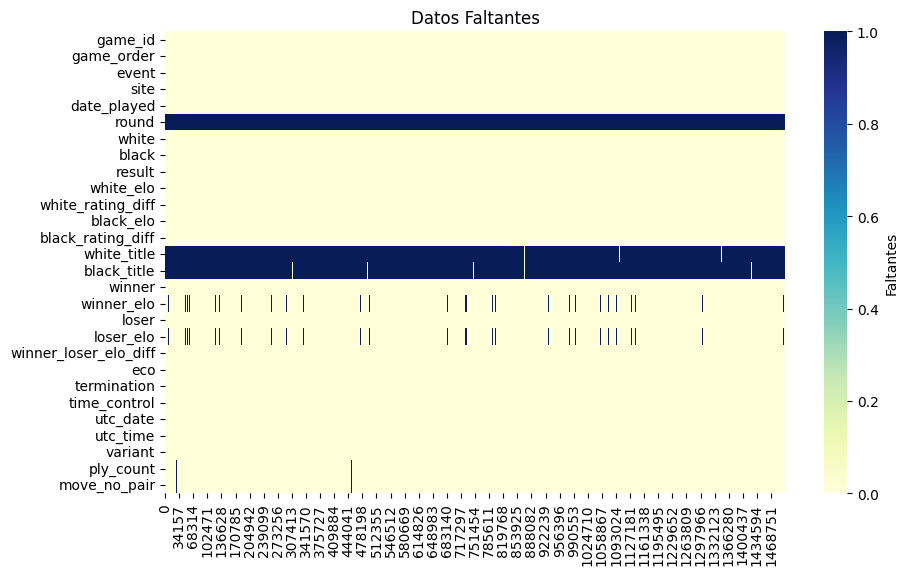

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Faltantes'})
plt.title("Datos Faltantes")

Vemos que los datos son extremadamente completos, habiendo relativamente pocos nulos dentro de las columnas.

En cuanto a las columnas x_title, era evidente que iba a tener muchos nulos ya que estas partidas provienen de un sitio web; y por ende, la mayoría de usuarios son casuales y no tienen un título.

Vemos también que existen nulos en winner_elo y loser_elo de los que probablemente podremos dispensar llegado al punto del análisis debido a la gran cantidad de datos con los que contamos (+1.5M)

Por último, vemos algunos nulos en ply_count y move_no_pair los cuales pueden llegar a ser de las partidas no terminadas, marcadas con * en su result.

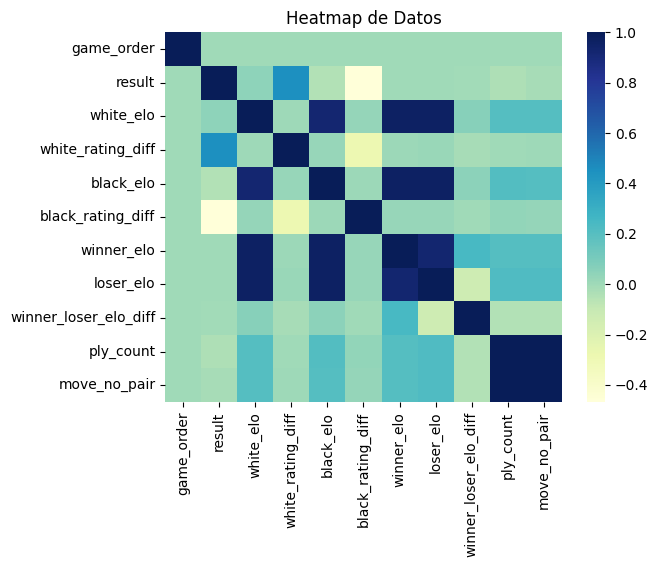

<Figure size 1000x0 with 0 Axes>

In [ ]:
solo_numericos = df.loc[:, (df.dtypes == np.float64) | (df.dtypes == np.int64)]
dataplot = sns.heatmap(solo_numericos.corr(), cmap="YlGnBu")
# displaying heatmap
plt.title("Heatmap de Datos")
plt.figure(figsize=(10,0))
plt.show()

Tras haber realizado esta revisión inicial del DataFrame, podemos concluir que la fuente de datos elegida es adecuada para el trabajo que queremos hacer. Contiene los atributos necesarios, la cantidad suficiente de datos, y no tiene muchos nulos en terminos relativos a la cantidad de datos.